In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [14]:
# N-body simulation data
MIN = 60
HR = 60 * MIN
DAY = 24 * HR
MONTH = 30 * DAY
YEAR = 12 * MONTH
papers = [
    #year, speed,                       inner, hardware, label,                    shortlabel
    #      physical years / CPU second
    (1950, (40/365)/(2*MIN),            0,     0,        "Ekert '52",              "EBC52"),
    (1965, (1500)/(HR),                 0,     0,        "Cohen & Hubbard '65",    "CH65"),
    #(1978, (40/365)/(10),               0,     0,        "TRS-80",                 "TRS-80"),
    (1984, 5e6/(4*HR),                  0,     1,        "Kinoshita & Nakai'84",   "KN84"),
    (1986, 60*1e8/(365*DAY),            0,     1,        "Applegate+ '86",         "A+86"),
    (1991, 3e6/(2*MONTH),               1,     0,        "Quinn+ '91",             "QDT91"),
    (1991, 1e9/(14*DAY),                0,     0,        "Wisdom & Holman '91",    "WH91"),
    (2008, 20e9 / (6*MONTH),            1,     0,        "Batygin & Laughlin '08", "BL08"),
    (2009, 5e9 / (2500*HR),             1,     0,        "Laskar & Gastineau '09", "LG09"),
    (2020, 5e9*96 / (6*12*MONTH),       1,     0,        "Brown & Rein '20",       "BR20"),
    (2023, 2 * 2750 * 5e9 / (2.5e6*HR), 1,     0,        "Abbot+ '23",             "A+23"),
    (2023.6, 5e9 / (DAY),                 1,     0,        "Javaheri+ '23",          "JRT23"),
     ]

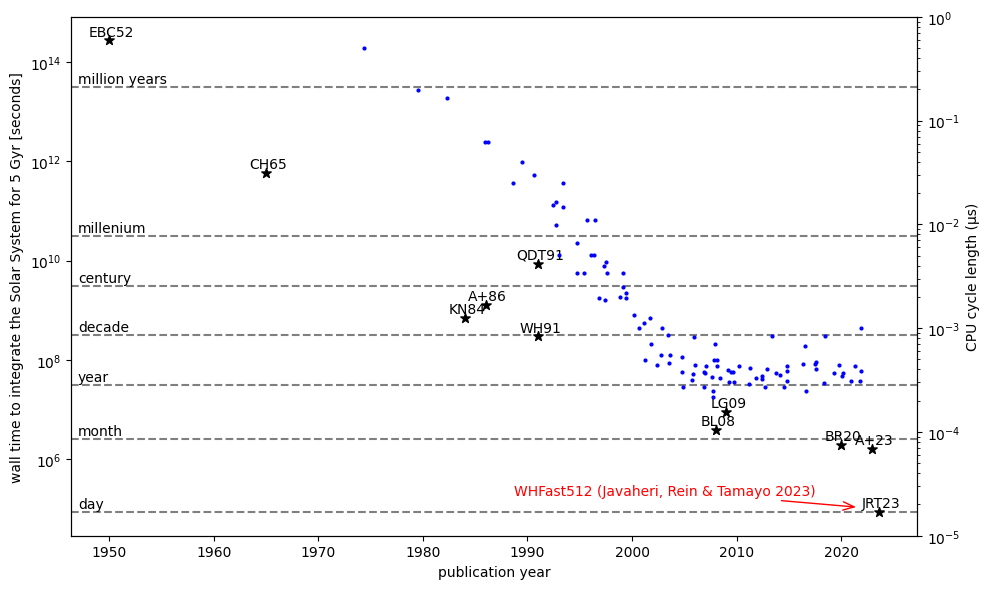

In [37]:
# the plot
fig, ax = plt.subplots(figsize=(10,6))
ax.set_yscale('log')
ax.set_ylabel("wall time to integrate the Solar System for 5 Gyr [seconds]")
TO_MYR_PER_MONTH = MONTH/1e6
for i, data in enumerate(papers):
    year, speed, inner, hardware, label, shortlabel = data
    if inner == 0:
        # Time re-scaling for simulations of outer SS only
        #   -- Note- should probably include factor of something like (8/4)**2 to be more fair
        speed /= (5.2/0.387)**(1.5)
    walltime = 1./speed*5e9
    ax.scatter(year,walltime,color='k',zorder=99,marker='*',s=50)
    ax.annotate(shortlabel, (year+0.2,walltime*1.25), ha='center')
ax.annotate("WHFast512 (Javaheri, Rein & Tamayo 2023)", (year-1.9,walltime*1.25), (year-6,walltime*2.25), ha='right',
           arrowprops=dict(color='red', arrowstyle='->,head_width=.15', mutation_scale=20), color="red")    

    
times = [
    ("day", DAY),
    ("month", MONTH),
    ("year", YEAR),
    ("decade", YEAR*1e1),
    ("century", YEAR*1e2),
    ("millenium", YEAR*1e3),
    ("million years", YEAR*1e6),
]
for label, t in times:
    y = t
    ax.axhline(y=y, color="black", alpha = 0.5, ls="--")
    ax.annotate(label, (1947,y*1.21), ha='left')

# CPU clock speed
if True:
    # CPU clock speed data
    # Source: https://www.karlrupp.net/2018/02/42-years-of-microprocessor-trend-data/
    with open("./frequency.dat","r") as fi:
        lines = fi.readlines()
    freq_data=np.array([list(map(float,l.split())) for l in lines])
    yr,freq=freq_data.T
    ax2 = ax.twinx()
    ax2.set_yscale('log')
    ax2.set_ylabel("CPU cycle length (μs)")
    ax2.plot(yr,1/freq,'b.', ms=4,zorder=0,label='CPU clock rates [MHz]')
    ax2.set_ylim([1e-5,1])
# Cosmetics
ax.set_xlabel("publication year")
fig.tight_layout()